In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import pandas as pd
import numpy as np

(1421,
 5,
 [21.998040874782703, -18.075163999950632, 0.0, 0.0],
 [33.708576224001774, -8.224359999937205, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7fd84907fc88>)

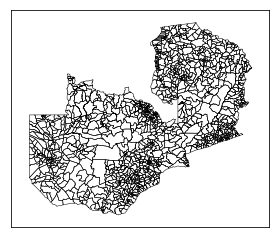

In [2]:
m = Basemap(resolution = 'h', # c, l, i, h, f or None
           projection = 'merc',
           lat_0 = 27.80, lon_0 = -13.20,
           llcrnrlon = 21.01, llcrnrlat = -18.69, urcrnrlon = 34.61, urcrnrlat = -7.56)
m.readshapefile('../../0_originalData/Zambia/administrative_shapefiles/ward/WardShapefiles11June2014/Final_edits_Zambia_Wards_2014t',
                'wards')

In [3]:
laborAll = pd.read_csv('../../3_csvOutput/censuswardlabor1564.csv')

In [4]:
print(len(laborAll))
laborAll.head()

1421


,dist,const,ward,wardid,population1564,popthiscase,lf7days,lf12months,empl7days,empl12months,unem7days,unem12months
0,101,1,1,10100101,7894,7894,4542,4785,4215,4525,327.0,260.0
1,101,1,2,10100102,3308,3308,1269,1390,1107,1209,162.0,181.0
2,101,1,3,10100103,7371,7371,3597,4396,3504,4305,93.0,91.0
3,101,1,4,10100104,10603,10603,5441,6022,5142,5751,299.0,271.0
4,101,1,5,10100105,11796,11796,5919,6069,5461,5497,458.0,572.0


In [5]:
dfPoly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), closed=True) for shape in m.wards],
        'wardid': [int(ward['ID']) for ward in m.wards_info]
    })

dfPoly = dfPoly.merge(laborAll, on='wardid', how='outer', indicator = True)


In [6]:
dfPoly.wardid.groupby(dfPoly._merge).agg([len])

,len
_merge,
left_only,0
right_only,0
both,1431


In [7]:
len(dfPoly.wardid.unique())

1421

In [8]:
dfPoly[['shapes', 'wardid', 'population1564', '_merge']][dfPoly.wardid.duplicated(keep = False) == True]

,shapes,wardid,population1564,_merge
337,"Poly((788660, 668732) ...)",20301816,2111,both
338,"Poly((788662, 668733) ...)",20301816,2111,both
339,"Poly((788666, 668737) ...)",20301816,2111,both
340,"Poly((788671, 668741) ...)",20301816,2111,both
341,"Poly((788671, 668741) ...)",20301816,2111,both
580,"Poly((1.23518e+06, 536152) ...)",30304510,5111,both
581,"Poly((1.23518e+06, 536152) ...)",30304510,5111,both
1139,"Poly((579063, 568216) ...)",80410621,1596,both
1140,"Poly((576607, 547808) ...)",80410621,1596,both
1141,"Poly((575844, 549290) ...)",80410621,1596,both


In [9]:
dfPoly[['shapes', 'wardid']][dfPoly.shapes.duplicated(keep = False) == True]

,shapes,wardid


In [17]:
dfPoly['popDeciles'], bins = pd.qcut(dfPoly.population1564, 10, labels = False, retbins = True)
binLabels = []
for i in range(10):
    binLabels.append('(' + str(int(bins[i])) + ',' + str(int(bins[i + 1])) + ']')


/home/ram22/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


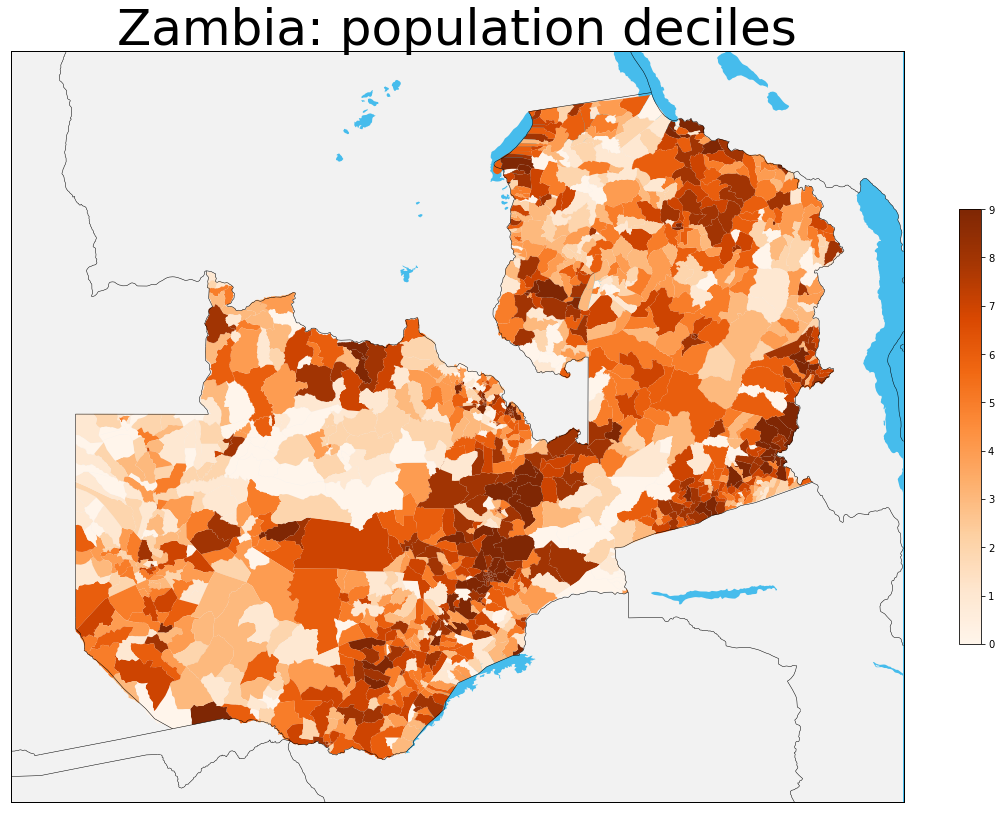

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.get_cmap('Oranges')   

pc = PatchCollection(dfPoly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(dfPoly.popDeciles.fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(dfPoly.popDeciles)

m.drawmapboundary(fill_color = '#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color = '#46bcec')
m.drawcountries()

plt.colorbar(mapper, shrink=0.4)
plt.title('Zambia: population deciles', fontsize = 50)

In [25]:
fig.savefig("popDeciles", bbox_inches='tight')
plt.close(fig)

/home/ram22/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


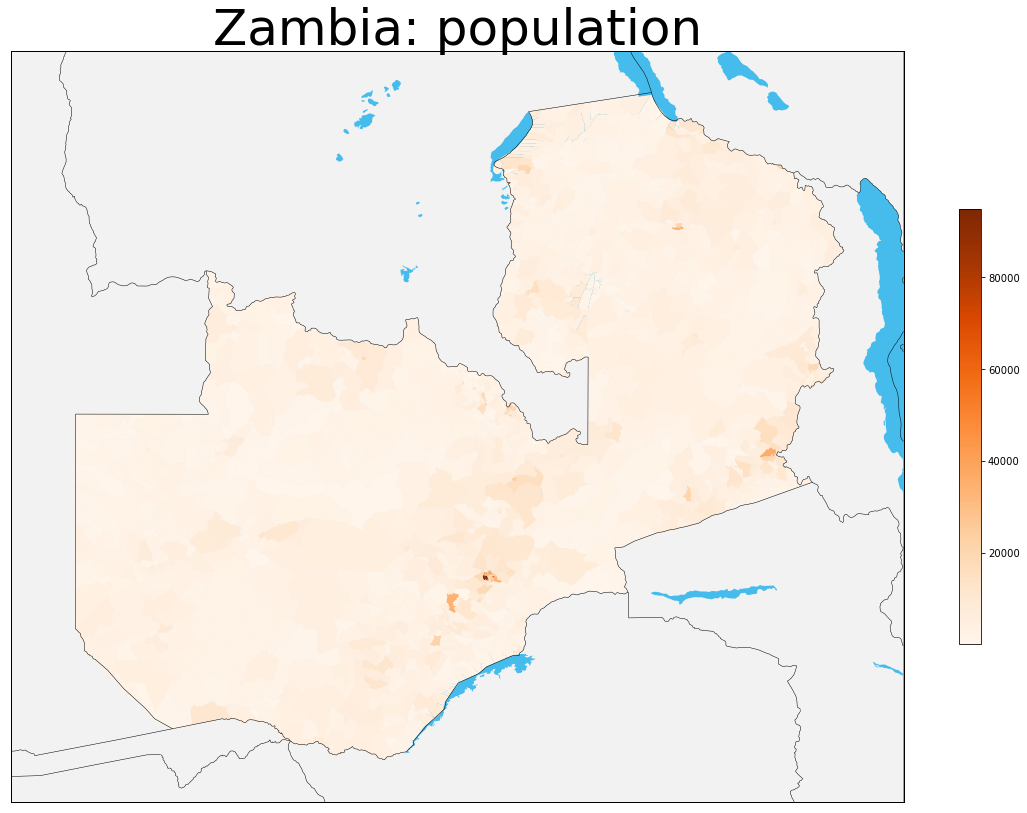

In [26]:
fig2, ax2 = plt.subplots(figsize=(20, 20))

cmap = plt.get_cmap('Oranges')   

pc2 = PatchCollection(dfPoly.shapes, zorder=2)
norm = Normalize()

pc2.set_facecolor(cmap(norm(dfPoly.population1564.fillna(0).values)))
ax2.add_collection(pc2)

mapper2 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper2.set_array(dfPoly.population1564)

m2 = m
m2.drawmapboundary(fill_color = '#46bcec')
m2.fillcontinents(color='#f2f2f2', lake_color = '#46bcec')
m2.drawcountries()

plt.colorbar(mapper2, shrink=0.4)
plt.title('Zambia: population', fontsize = 50)

In [27]:
fig2.savefig("popAbsolute", bbox_inches='tight')
plt.close(fig2)